NAMA  : SHIVA AMALIA SETIAWAN<br>
NIM   : 211351139<br>
KELAS : PAGI A<br>

# Import Dataset Kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivaamaliasetiawan","key":"1b0d8e6b2406dba7a0f1dabbeb81d99d"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d camnugent/california-housing-prices

  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 89.6MB/s]


In [4]:
!mkdir california-housing-prices
!unzip california-housing-prices.zip -d california-housing-prices
!ls california-housing-prices

Archive:  california-housing-prices.zip
  inflating: california-housing-prices/housing.csv  
housing.csv


# Import Library yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [6]:
df = pd.read_csv("/content/california-housing-prices/housing.csv")
df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1422,-122.05,38.0,36.0,2476.0,472.0,1213.0,393.0,3.7333,136400.0,NEAR BAY


# Data Discovery

In [7]:
df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7273,-118.24,33.99,28.0,312.0,89.0,498.0,87.0,2.4107,96400.0,<1H OCEAN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype == "float64" or df[col].dtype == "int64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [11]:
numerical

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [12]:
catgcols

['ocean_proximity']

In [13]:
ind_col = [col for col in df.columns if col != 'ocean_proximity']
dep_col = 'ocean_proximity'

In [14]:
df[dep_col].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# EDA

<Axes: >

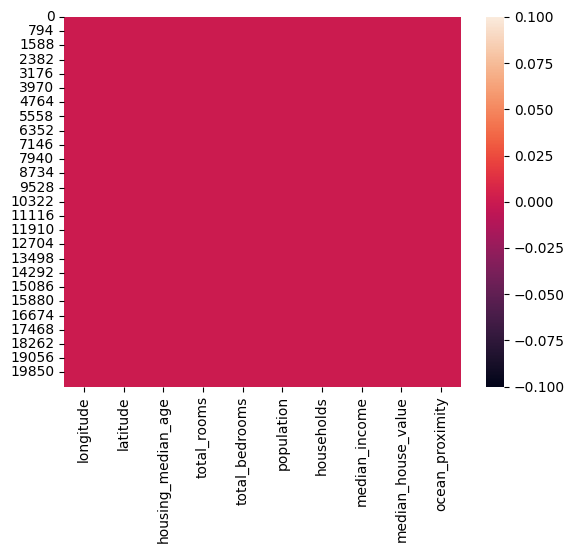

In [16]:
sns.heatmap(df.isnull())

<ipython-input-17-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

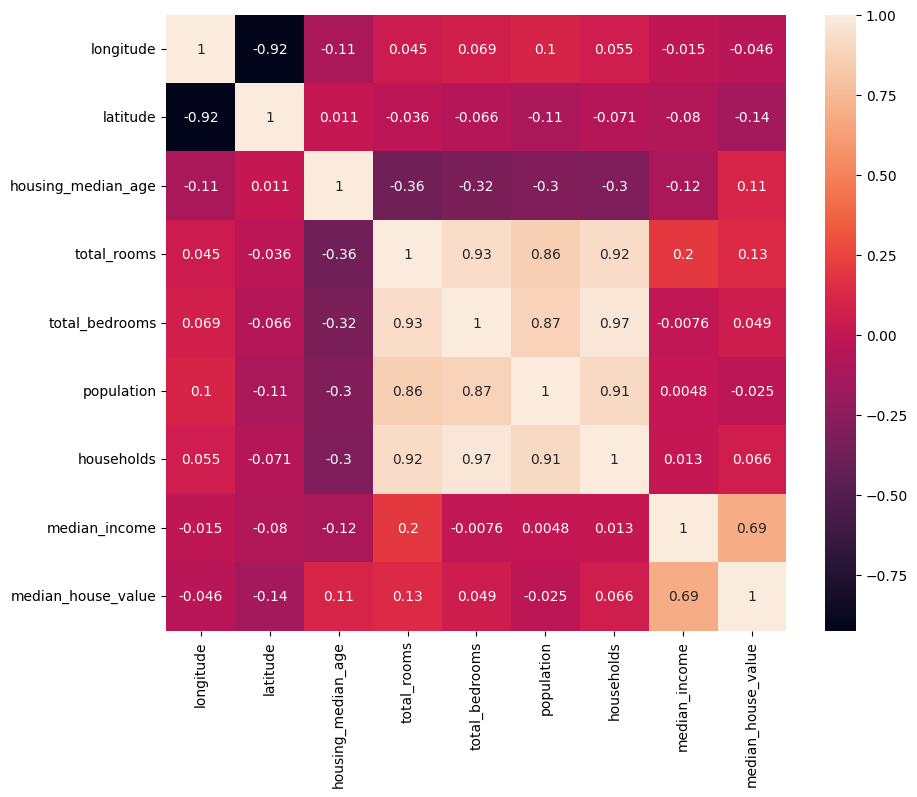

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

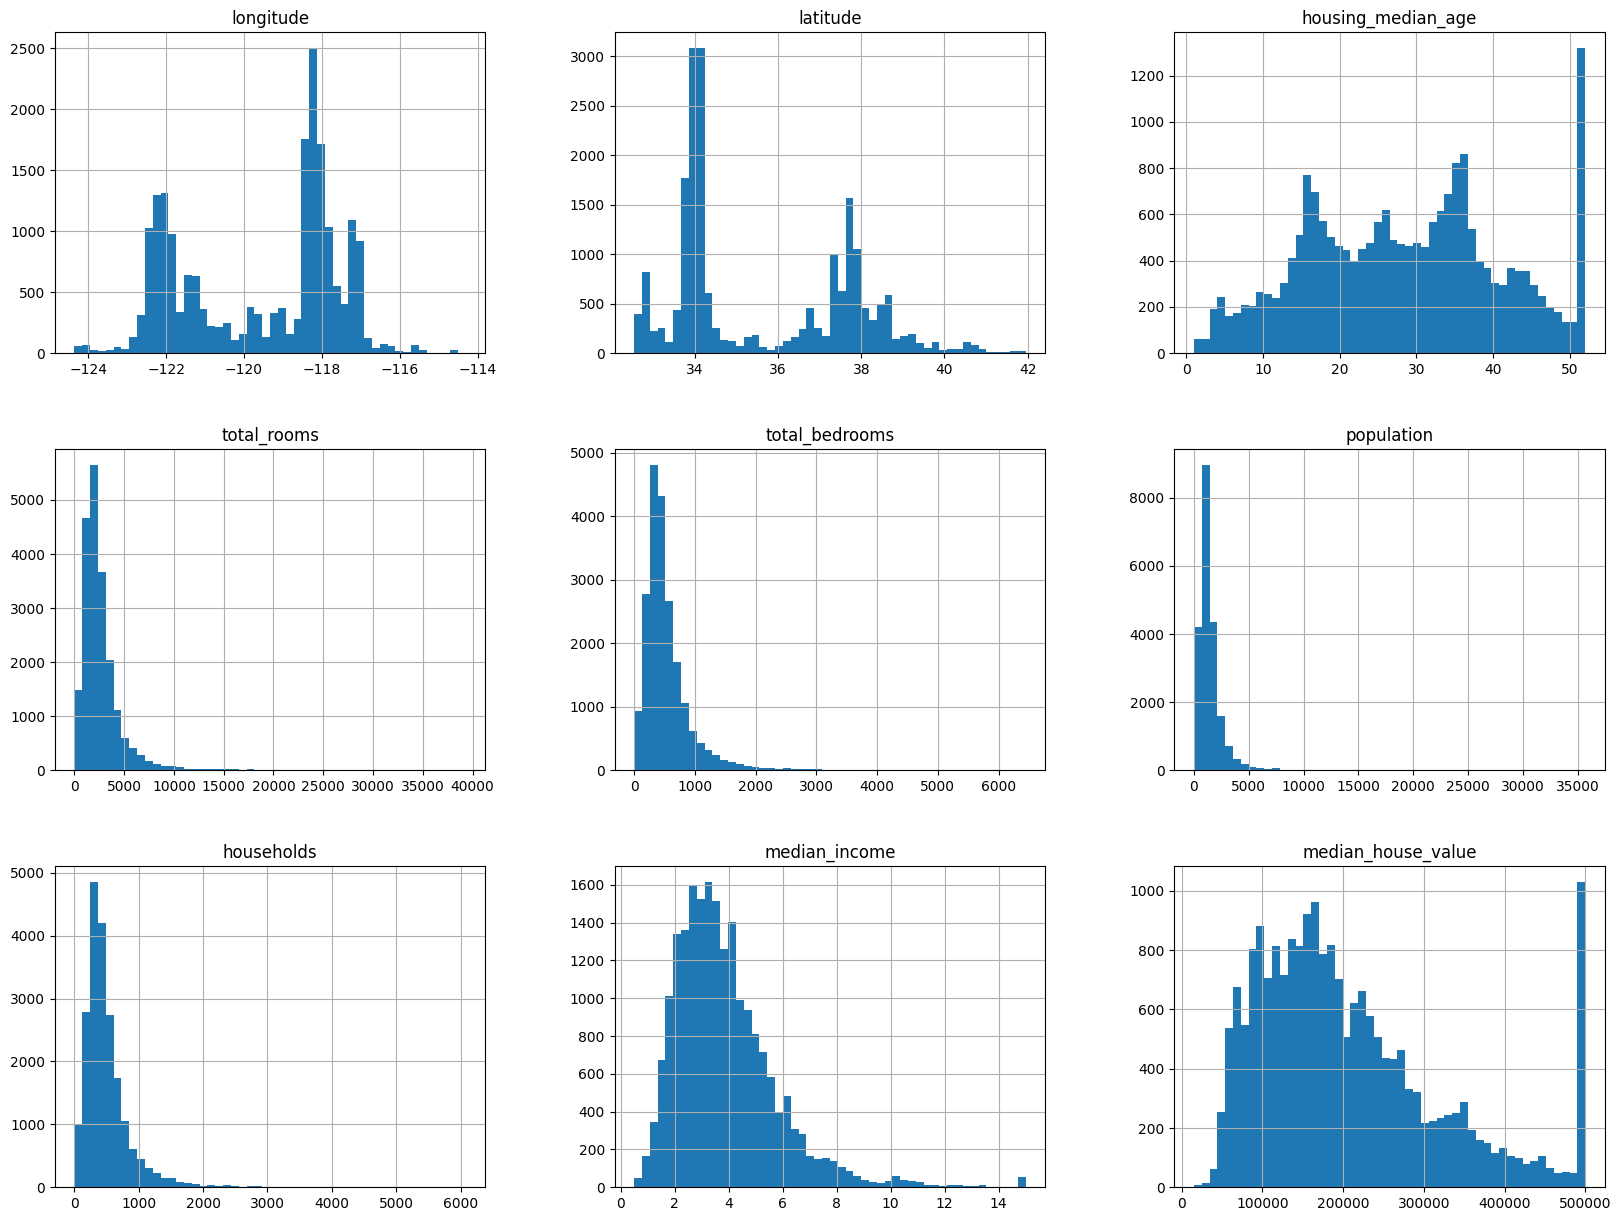

In [18]:
df.hist(bins=50, figsize=(20,15))
plt.show()

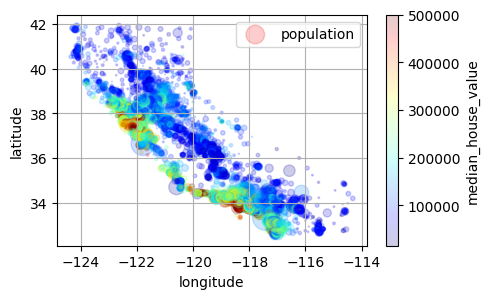

In [19]:
df.plot(kind='scatter', x='longitude', y='latitude',
             alpha=0.2, figsize = (5,3), grid = True,
             s=df['population']/100, label = 'population',
             c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.show()

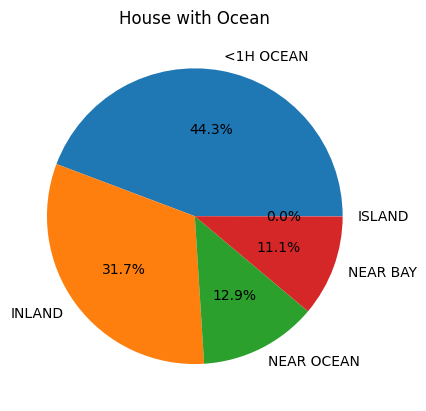

In [20]:
x = df['ocean_proximity'].value_counts()
plt.pie(x,labels=['<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY','ISLAND'],autopct="%1.1f%%")
plt.title('House with Ocean')
plt.show()

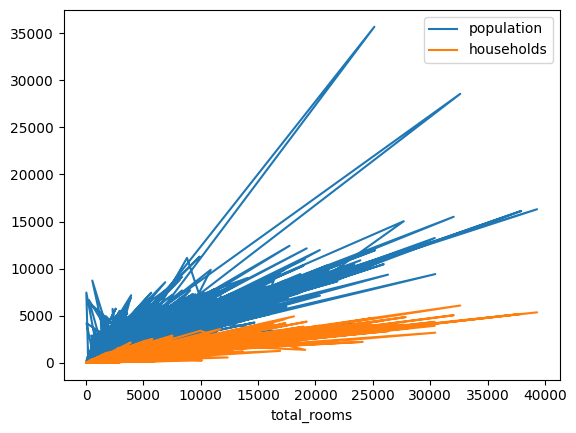

In [22]:
df.plot(x="total_rooms", y=[ 'population',"households"])
plt.show()

# Data Preparition

In [23]:
df.to_csv('housing.csv')

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
  df[col] = le.fit_transform(df[col])

In [25]:
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

In [26]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [27]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [28]:
df['ocean_proximity'].value_counts()

0    9136
1    6551
4    2658
3    2290
2       5
Name: ocean_proximity, dtype: int64

# Modeling

In [29]:
features = ['longitude','latitude',	'housing_median_age',	'total_rooms',	'total_bedrooms',	'population',	'households',	'median_income',	'median_house_value']
x = df[features]
y = df['ocean_proximity']
x.shape, y.shape

((20640, 9), (20640,))

In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

# Assuming you have defined x_train, y_train, x_test, and y_test

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"Akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Akurasi data testing = {dtc_acc} \n")

print(f"Confusion matrix : \n {confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
print(f"Classification report : \n {classification_report(y_test, dtc.predict(x_test))}")

Akurasi data training = 0.856952519379845
Akurasi data testing = 0.8573158914728682 

Confusion matrix : 
 [[1591   72    0   49  169]
 [  82 1142    0   10   31]
 [   1    0    0    0    0]
 [   0    0    0  457    8]
 [  99   28    0   40  349]]

Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.85      0.87      1881
           1       0.92      0.90      0.91      1265
           2       0.00      0.00      0.00         1
           3       0.82      0.98      0.90       465
           4       0.63      0.68      0.65       516

    accuracy                           0.86      4128
   macro avg       0.65      0.68      0.67      4128
weighted avg       0.86      0.86      0.86      4128



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
import numpy as np

input_data = (-118.41,	34.04,	49.0,	601.0,	95.0,	228.0,	106.0,	8.0239,	500001.0)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)

if prediction[0] == 0:
    print('Pembeli membeli rumah dekat Laut')
else:
    print('Pembeli membeli rumah tidak dekat Laut')

[0]
Pembeli membeli rumah dekat Laut


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Visualisasi dari model

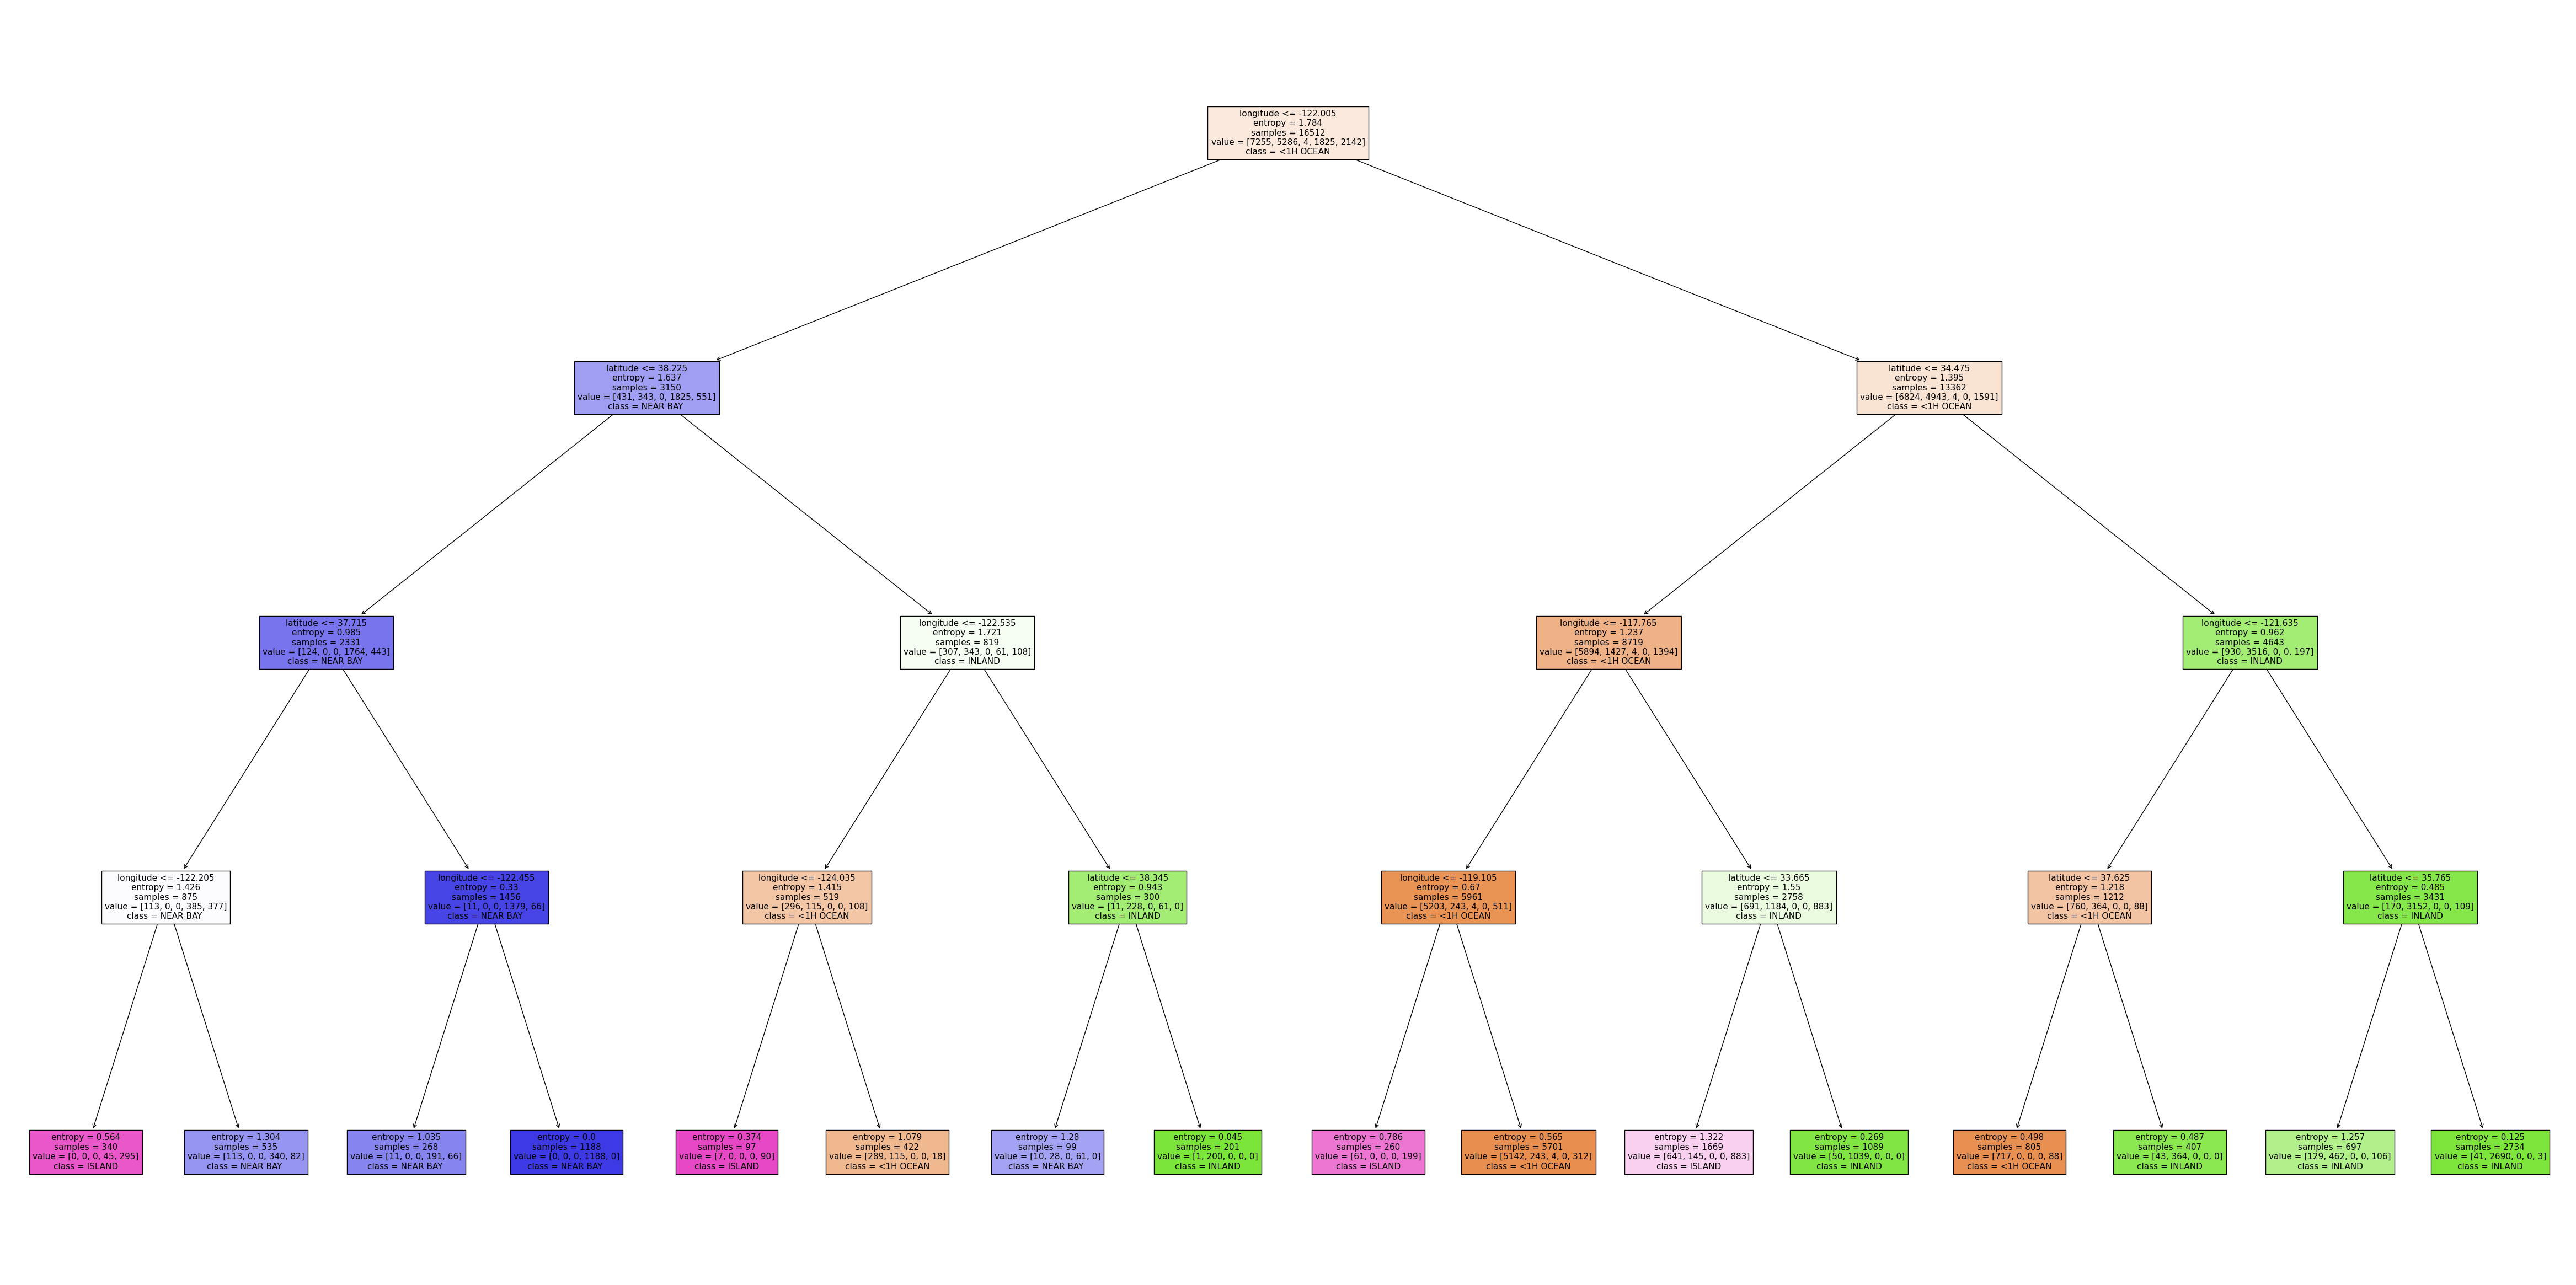

In [34]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(60,30))
tree.plot_tree(
    model,
    feature_names=ind_col,
    class_names=['<1H OCEAN', 'INLAND', 'NEAR OCEAN ', 'NEAR BAY ', 'ISLAND'],
    filled=True
)
plt.show()

# Save Pickle

In [35]:
import pickle
filename = "california_house.sav"
pickle.dump(model, open(filename, 'wb'))